## 1. 加载数据
### 1.1 Pytorch中的dataset

https://pytorch.org/docs/stable/data.html   

In [1]:
import torch
from torch.utils.data import Dataset

In [2]:
class SimpleSet(Dataset):    
    def __init__(self, length = 100, transform = None):
        self.x1 = 2 * torch.ones(length, 2) # 样本， length是样本数量， 2是样本特征数
        self.y1 = torch.ones(length, 1)  # x1样本对应的标签
        self.x2 = torch.zeros(length, 2) - 1
        self.y2 = torch.zeros(length, 1) 
           
        self.x = torch.cat((self.x1, self.x2), dim=0) # 拼接上面的数据
        self.y = torch.cat((self.y1, self.y2))
        
        self.transform = transform # 变换函数
        self.len = len(self.x)  # 数据长度
     
    # Getter
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)     
        return sample
    
    # Get Length
    def __len__(self):
        return self.len

In [4]:
dataset0 = SimpleSet()

In [5]:
dataset0[0]

(tensor([2., 2.]), tensor([1.]))

In [6]:
dataset0[-1]

(tensor([-1., -1.]), tensor([0.]))

### 1.2 dataset中的Transforms

In [7]:
class PowerTrans():
    def __init__(self, n = 2):
        self.n = n
    
    # 执行函数
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        
        x = torch.pow(x, self.n)
        
        return x, y

In [8]:
pow_transform = PowerTrans(n=3)
dataset1 = SimpleSet(transform=pow_transform)

In [9]:
dataset1[0]

(tensor([8., 8.]), tensor([1.]))

In [10]:
dataset1[-1]

(tensor([-1., -1.]), tensor([0.]))

### 1.3 transforms.Compose

In [11]:
from torchvision import transforms

In [12]:
class MultTrans(object):
    
    # Constructor
    def __init__(self, mult = 10):
        self.mult = mult
        
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x * self.mult
        sample = x, y
        return sample

In [13]:
data_transform = transforms.Compose([PowerTrans(), MultTrans()])

In [14]:
dataset2 = SimpleSet(transform=data_transform)
dataset2[0]

(tensor([40., 40.]), tensor([1.]))

In [15]:
dataset2[-1]

(tensor([10., 10.]), tensor([0.]))

### 1.4 DataLoader

In [16]:
dataset2[:5]

(tensor([[40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.]]), tensor([[1.],
         [1.],
         [1.],
         [1.],
         [1.]]))

In [17]:
dataset2[5:10]

(tensor([[40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.]]), tensor([[1.],
         [1.],
         [1.],
         [1.],
         [1.]]))

In [18]:
# 如果dataset中的样本是按label顺寻存放的，那么在训练集使用乱序模式，
# 为了能在一个batch_size的样本数量内接触更多类别的样本，
# 防止网络模型对某一个类型产生过拟合，提高模型的泛化能力。
# 测试集则不需要。
dataloaders = torch.utils.data.DataLoader(dataset=dataset2,  batch_size=100, shuffle=False)

In [21]:
len(dataloaders)

2

In [19]:
it_data = iter(dataloaders)

In [20]:
first_batch_data = next(it_data)
first_batch_data

[tensor([[40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40., 40.],
         [40.

In [42]:
for i, (x, y) in enumerate(dataloaders):
    print(x, y)
    print(i)

tensor([[40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],
        [40., 40.],


## 1.5 ImageFolder

https://pytorch.org/docs/stable/torchvision/datasets.html   
https://github.com/pytorch/vision/blob/master/torchvision/datasets/folder.py

文件存放规则：
```
root/类别1/xxx.png
root/类别1/xxy.png
root/类别1/xxz.png
...
root/类别n/123.png
root/类别n/nsdf3.png
root/类别n/asd932_.png
```

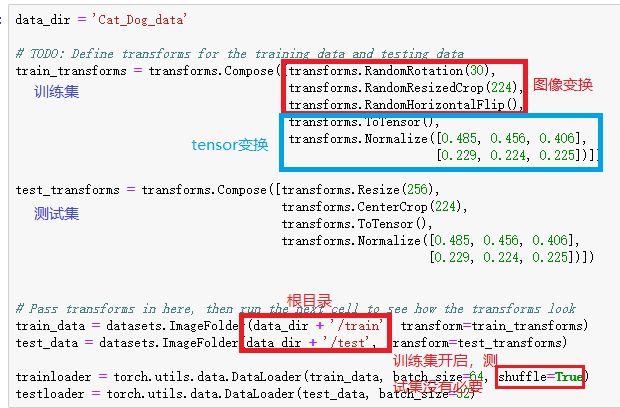
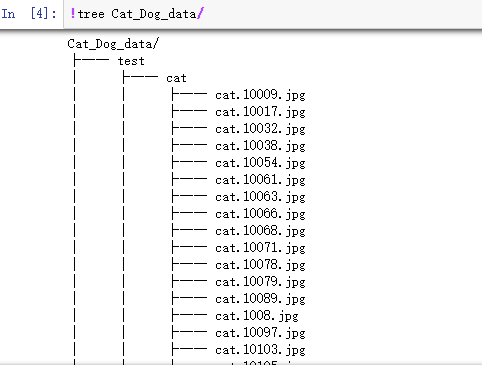
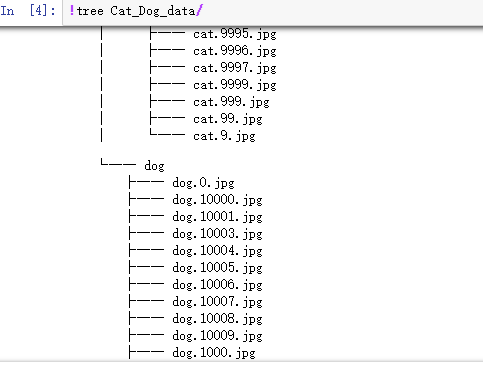

1. **训练集中，使用图像反转、倾斜等变换是为了对图像数据进行拓展，让模型学习到更多的特征，提高模型的泛化能力。**
2. 图像为什么要使用归一化（图像标准化）：归一化使得取值范围从0～255转化为0～1之间。https://zhuanlan.zhihu.com/p/35597976

### 加载数据, 通关提示👇

1. 仿照照上面的方式定义好train_transforms和test_transforms
2. train_datasets使用train_transforms， valid_datasets和test_dataset使用test_transforms 
3. train_loader使用乱序，valid_loader和test_loader不使用

----
```python
train_dir = '/data/flowers/train'
valid_dir = '/data/flowers/valid'
test_dir = '/data/flowers/test'
```
----
```python
# TODO: 定义transforms
train_transforms = 
test_transforms = 
# TODO: 使用dir路径定义datasets，注意配置相对应的transforms
train_datasets = 
valid_datasets = 
test_dataset =
# TODO: 使用datasets定义dataloaders
train_loader = 
valid_loader =
test_loader =
```
----

## 2. Label mapping

In [43]:
import json

with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
    for cat in cat_to_name:
        print('{}:{}'.format(cat, cat_to_name[cat]))

21:fire lily
3:canterbury bells
45:bolero deep blue
1:pink primrose
34:mexican aster
27:prince of wales feathers
7:moon orchid
16:globe-flower
25:grape hyacinth
26:corn poppy
79:toad lily
39:siam tulip
24:red ginger
67:spring crocus
35:alpine sea holly
32:garden phlox
10:globe thistle
6:tiger lily
93:ball moss
33:love in the mist
9:monkshood
102:blackberry lily
14:spear thistle
19:balloon flower
100:blanket flower
13:king protea
49:oxeye daisy
15:yellow iris
61:cautleya spicata
31:carnation
64:silverbush
68:bearded iris
63:black-eyed susan
69:windflower
62:japanese anemone
20:giant white arum lily
38:great masterwort
4:sweet pea
86:tree mallow
101:trumpet creeper
42:daffodil
22:pincushion flower
2:hard-leaved pocket orchid
54:sunflower
66:osteospermum
70:tree poppy
85:desert-rose
99:bromelia
87:magnolia
5:english marigold
92:bee balm
28:stemless gentian
97:mallow
57:gaura
40:lenten rose
47:marigold
59:orange dahlia
48:buttercup
55:pelargonium
36:ruby-lipped cattleya
91:hippeastrum
29:a

## 3. 构建和训练分类器
### 3.1 构建自己的卷积网络（补充）
https://pytorch.org/docs/stable/nn.html#

In [44]:
import torch 
import torch.nn as nn

class MyCNN(nn.Module):

    # 定义各个网络层， 假设图像大小是(224, 224)
    def __init__(self):
        super().__init__()
        # [None, 1, 224, 224] -> [None, 8, 224, 224]
        # 224+2 = 226  226-3 / 1 + 1 = 224
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        # [None, 8, 224, 224] -> [None, 8, 112, 112]
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        # [None, 8, 112, 112] -> [None, 16, 112, 112]
        self.cnn2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        # [None, 16, 112, 112] -> [None, 16, 56, 56]
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        # [None, 16 *56 * 56] -> [None, 10]
        self.fc1 = nn.Linear(16 * 56 * 56, 10)
        
    
    # Prediction，前向传播过程
    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        out = self.cnn2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        out = out.view(out.size(0), -1)  # 铺平
        out = self.fc1(out)
        
        return out  

In [46]:
img = torch.ones([1, 1, 224, 224])

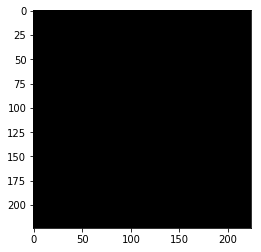

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img[0][0], cmap='gray')

In [48]:
model = MyCNN()
y = model(img)

In [53]:
pro = torch.softmax(y, dim=1)

In [54]:
pro

tensor([[0.1027, 0.0996, 0.0947, 0.1034, 0.1025, 0.0980, 0.0991, 0.1009, 0.0982,
         0.1010]], grad_fn=<SoftmaxBackward>)

In [55]:
torch.sum(pro)

tensor(1.0000, grad_fn=<SumBackward0>)

### 3.2 迁移学习
https://www.zhihu.com/topic/20079475/intro   
https://pytorch.org/docs/master/torchvision/models.html   
https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html   
[教室：迁移学习解决方案](https://classroom.udacity.com/nanodegrees/nd089-cn-vip/parts/655c0eb7-8b46-4721-b982-6b541207fa28/modules/299dafc1-3ac7-4163-ab74-398a53da4dd5/lessons/ced34997-9af9-4f41-85c7-0e6940378d68/concepts/3ebe65d4-bd9d-43c1-b100-274c0d5e638e)
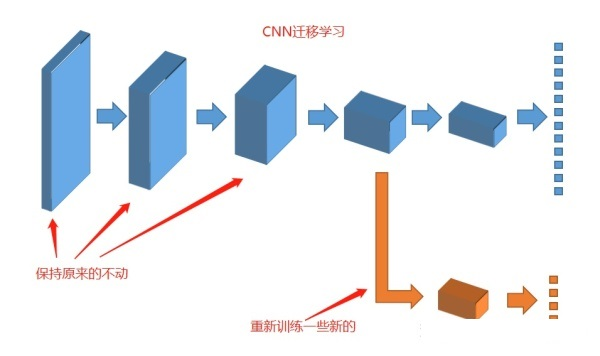

In [56]:
from torchvision import models

# 带预训练参数的vgg16
model = models.vgg16(pretrained=True)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [59]:
model.classifier[0].in_features

25088

#### 怎么使用vgg进行迁移学习？
1. 固定classifier之前的网络参数。https://pytorch.org/docs/stable/notes/autograd.html?highlight=param%20requires_grad
2. 定义自己的classifier, 保证最后一层的out_features是我们训练的类别数目。
3. 把原本VGG的classifier替换为自己定义的classifier
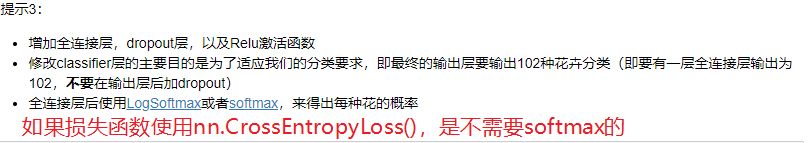

### 构建和训练分类器， 通关提示👇
1. 定义预训练模型 model = 
2. 设置每一层的param.requires_grad标志为false
3. 定义自己的classifier， classifier =
4. 将model的classifier替换为新的 model.classifier = classifier （无需修改）
5. 将模型转入gpu model.cuda() （无需修改）

### 3.3 定义损失函数
1. nn.NLLLoss： input 在输入NLLLoss()之前，需要对input做log_softmax 或者softmax。即将input转换成概率分布的形式，并且取对数。`NLLLoss(x, class) = -x[class]`
2. nn.CrossEntropyLoss：是log_softmax和nn.NLLLoss的结合。

$$softmax(x_i) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$$ 
  
$$log\rule[-2pt]{0.1cm}{0.5pt}softmax(x_i) = log_e(softmax(x_i))$$

In [61]:
torch.manual_seed(0)
# 一个样本
x = torch.randn(1, 5, requires_grad=True)
print('x = ', x[0])
# 样本对应的标签
target = torch.tensor([1])
# softmax
softmax = nn.Softmax(dim=1)
x_softmax = softmax(x)
print('x_softmax=', x_softmax[0])
# log
x_log_softmax = torch.log(x_softmax)
print('x_log_softmax=', x_log_softmax)
# NLLLoss
nll_loss = nn.NLLLoss()
loss = nll_loss(x_log_softmax, target)
print('loss=', loss)

x =  tensor([ 1.5410, -0.2934, -2.1788,  0.5684, -1.0845], grad_fn=<SelectBackward>)
x_softmax= tensor([0.6118, 0.0977, 0.0148, 0.2313, 0.0443], grad_fn=<SelectBackward>)
x_log_softmax= tensor([[-0.4913, -2.3257, -4.2111, -1.4639, -3.1168]], grad_fn=<LogBackward>)
loss= tensor(2.3257, grad_fn=<NllLossBackward>)


In [62]:
log_softmax = nn.LogSoftmax(dim=1)
output = nll_loss(log_softmax(x), target)
output

tensor(2.3257, grad_fn=<NllLossBackward>)

In [63]:
ce_loss = nn.CrossEntropyLoss()
ce_loss(x, target)

tensor(2.3257, grad_fn=<NllLossBackward>)

### 3.4 设置优化器
这一步是选择一种计算梯度下降的算法。   
一般使用torch.optim.Adam

### criterion和optimizer， 通关提示👇
1. 若损失函数选择criterion = nn.CrossEntropyLoss()，则classifier中最后一层不应该增加激活函数
2. optimizer推荐选择Adam，收敛比较快

### 3.5 训练网络， 通关提示👇
以课程中迁移学习lab代码进行讲解。  
**训练部分**
```python
# 所有样本的迭代次数，3的意思就是，在训练过程中，
# 所有的样本都会被训练3次,总训练次数也就是n*3，n是样本数
epochs = 3  
print_every = 40  # 每训练40次进行一次日志打印
steps = 0  # 记录训练次数的

# change to cuda
model.to('cuda') # 使用GPU进行训练

for e in range(epochs):
    running_loss = 0  # 统计训练的loss
    for ii, (inputs, labels) in enumerate(trainloader): # 遍历训练集
        steps += 1  # 统计训练次数
        
        inputs, labels = inputs.to('cuda'), labels.to('cuda')  # 需要把inputs, labels都放到显存里
        
        optimizer.zero_grad()  # 每次循环都要清理梯度
        
        # Forward and backward passes
        outputs = model.forward(inputs)   # 前向传播过程，得到预测值
        loss = criterion(outputs, labels)  # 计算预测值和真实值之间的loss
        loss.backward()  # 反向传播过程，计算梯度
        optimizer.step()  # 更新网络训练的参数 w,b
        
        running_loss += loss.item()  # 统计loss
        
        # 打印print_every次loss求平均后，打印出来
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))  
            
            running_loss = 0
```

**测试或者验证部分 通关提示👇**
```python
correct = 0  # 统计准确率
total = 0  # 统计每次迭代的样本数
with torch.no_grad():  # 不计算梯度，因为不需要做反向传播
    for data in testloader:  # 遍历测试集
        images, labels = data  # images 是图像数据的tensor, labels是对应的标签
        outputs = model(images)  # 得到预测值
        _, predicted = torch.max(outputs.data, 1)  # 求出预测的类别，也就是最大值对用的索引
        total += labels.size(0)  # 统计迭代的样本数
        # 计算准确率
        # item() get a Python number from a tensor containing a single value
        correct += (predicted == labels).sum().item()  

# 打印准确率
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

```

```python
# TODO: 训练网络，需要有loss和accuracy打印输出
def train(model, loader):
    pass

# TODO:测试网络，使用验证集或者测试集，训练模型时使用验证集，测试模型最终结果使用测试集
# 需要有loss和accuracy打印输出
def test(model, loader):
    pass

epoch = #TODO 修改epoch次数
for _ in range(1, epoch):
    train(model, #TODO)
    test(model, #TODO)
```

### 3.6 测试网络
```python
# TODO: 在测试集上进行测试，需要输出结果
test(model, #TODO)
```

In [69]:
a = torch.tensor([[[1]]])
a.item()

1

In [65]:
a

tensor([1])

In [72]:
60 - 61 % 60 + 61

120

In [11]:
l = [1, 2, 3, 5]
l[::-1]

[5, 3, 2, 1]

In [12]:
for i in l:
    print(i)
    if i == 2:
        l.remove(i)
    

1
2
5
